# ADM HW 2. Questions 1,2,4,7

In [1]:
#Loading datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('/home/dias/Desktop/HW/2020-Jan.csv')
name ='January'
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-01-01 00:00:00 UTC,view,1005073,2232732093077520756,construction.tools.light,samsung,1130.02,519698804,69b5d72f-fd6e-4fed-aa23-1286b2ca89a0
1,2020-01-01 00:00:01 UTC,view,1005192,2232732093077520756,construction.tools.light,meizu,205.67,527767423,7f596032-ccbf-4643-9bad-e36a209512b4
2,2020-01-01 00:00:01 UTC,view,100063693,2053013552427434207,apparel.shirt,turtle,136.43,519046195,d1e2f343-84bb-49bd-b13d-ca0f1ed9910e
3,2020-01-01 00:00:01 UTC,view,5100816,2232732103831716449,apparel.shoes,xiaomi,29.95,518269232,0444841c-38ef-410c-b11f-7b35ea4e5991
4,2020-01-01 00:00:02 UTC,view,100014325,2232732103294845523,apparel.shoes.step_ins,intel,167.20,587748686,31b7d4cf-dfac-4895-9927-90fa3254f860


In [2]:
#Setting numbers to show in float 
pd.set_option('float_format', '{:f}'.format)

In [3]:
#Getting information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55967041 entries, 0 to 55967040
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   event_type     object 
 2   product_id     int64  
 3   category_id    int64  
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        int64  
 8   user_session   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 3.8+ GB


In [4]:
df.describe()

,product_id,category_id,price,user_id
count,55967041.000000,55967041.000000,55967041.000000,55967041.000000
mean,21511983.785403,2184717820909243648.000000,291.091033,557482102.198503
std,32203756.237081,79286872914928800.000000,360.219409,33754742.462473
min,1000544.000000,2053013551857008896.000000,0.000000,22165363.000000
25%,1005239.000000,2053013563835941632.000000,64.330000,522084631.000000
50%,5800192.000000,2232732093077520640.000000,166.730000,558259891.000000
75%,25800005.000000,2232732097993245184.000000,357.540000,591530886.000000
max,100099553.000000,2236178430586520064.000000,2574.070000,608822162.000000


In [5]:
df.dtypes

event_time        object
event_type        object
product_id         int64
category_id        int64
category_code     object
brand             object
price            float64
user_id            int64
user_session      object
dtype: object

## [RQ1] A marketing funnel describes your customer’s journey with your e-commerce. It may involve different stages, beginning when someone learns about your business, when he/she visits your website for the first time, to the purchasing stage, marketing funnels map routes to conversion and beyond. Suppose your funnel involves just three simple steps: 1) view, 2) cart, 3) purchase. Which is the rate of complete funnels? 

In [6]:
df.event_type.unique()

array(['view', 'cart', 'purchase'], dtype=object)

In [7]:
#Here I group all event_time values by product_id and user_id 
table1 = pd.pivot_table(df, values='event_time', index=['product_id','user_id'],
                    columns=['event_type'], aggfunc=len)
a=table1.dropna()
complete_funnels = a.min(axis=1).sum()
#I drop rows where at least one of them wasn't made, count sum and divide by total length
print('Rate of complete funnels in {} = {}'.format(name,complete_funnels/len(table1)))

Rate of complete funnels in January = 0.027439008924898062


### What’s the operation users repeat more on average within a session? Produce a plot that shows the average number of times users perform each operation (view/removefromchart etc etc).

In [8]:
#Here I grouped by session and took all average numbers of events in event_type
mean=[]
for i in df.event_type.unique():
    mean.append(df[df.event_type == i].groupby(['user_session']).event_type.count())
for i in range(len(mean)):
    mean[i]=mean[i].mean()
mean

[3.815561953579211, 1.7112130737992748, 1.208526189339007]

The operation users repeat more on average within a session in January: 


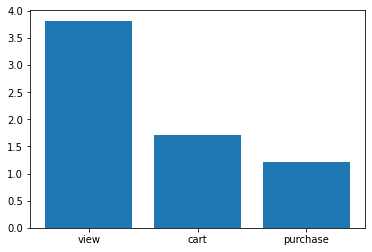

In [9]:
#and then plot a bar, and took tha name of event with highest number
plt.bar(df.event_type.unique(),mean);
print('The operation users repeat more on average within a session in {}: '.format(name, df.event_type.unique()[0]))

### How many times, on average, a user views a product before adding it to the cart?

In [ ]:
#I made a pivot table of the times of first events that users made
table = pd.pivot_table(df, values='event_time', index=['product_id','user_id'],
                    columns=['event_type'], aggfunc=min)
table

In [ ]:
#and then counted probability of user to view a product before buying
answer = len(table[table['view']<table['cart']])/len(table)
answer

### What’s the probability that products added once to the cart are effectively bought?

In [ ]:
# the same pivot from above, counting all rows with time of 'cart' before the 'purchase' and divide by total length
answer = len(table[table['cart']<table['purchase']])/len(table['cart'].dropna())
answer

## [RQ2] What are the categories of the most trending products overall? For each month visualize this information through a plot showing the number of sold products per category. 

In [10]:
import seaborn as sns
#split category_code into 'category' and 'subcategory' columns
df[['category', 'subcategory']] = df['category_code'].str.split('.', 1, expand=True)
#count number of purchases of products and sort in descending order
group_purchase_by_cat=df[df['event_type']=='purchase'].groupby(['product_id','category']).count()

In [11]:
group_purchase_by_cat['user_id'].sort_values(ascending=False).head(10)
#As you can see the category of most trending products is electronics

product_id  category    
1004767     construction    36854
1005100     construction    26997
1005115     construction    26401
1005212     construction    16553
4804056     sport           15442
1002544     construction    14992
1005160     construction    11894
1005105     construction    10629
1004873     construction     9795
1004856     construction     9008
Name: user_id, dtype: int64

/home/dias/TTS/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of purchases')

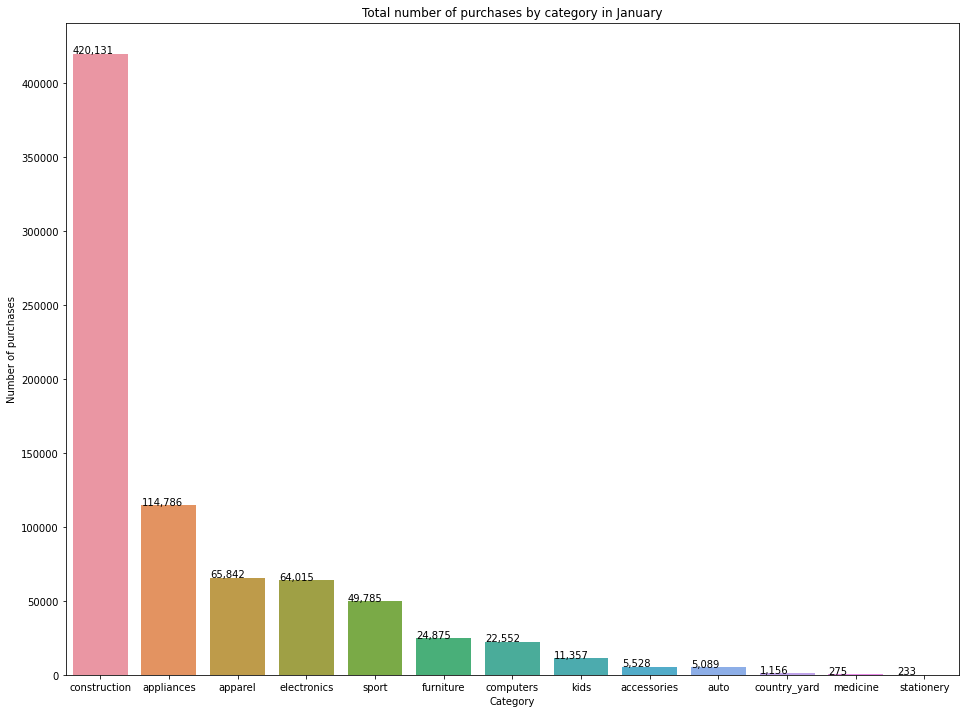

In [12]:
group_purchase_by_cat=df[df['event_type']=='purchase'].groupby(['category'])['price'].count()
sorted_group_purchase_by_cat = group_purchase_by_cat.dropna().sort_values(ascending=False)
plt.figure(figsize =(16, 12)) 
index_category = [str(i) for i in sorted_group_purchase_by_cat.index]
ax= sns.barplot(index_category,sorted_group_purchase_by_cat)
for p in ax.patches:
    ax.annotate(format(p.get_height(),',.0f'), (p.get_x() , p.get_height()),)
plt.title('Total number of purchases by category in {}'.format(name))
plt.xlabel('Category')
plt.ylabel('Number of purchases')

### Plot the most visited subcategories.

/home/dias/TTS/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Number of views')

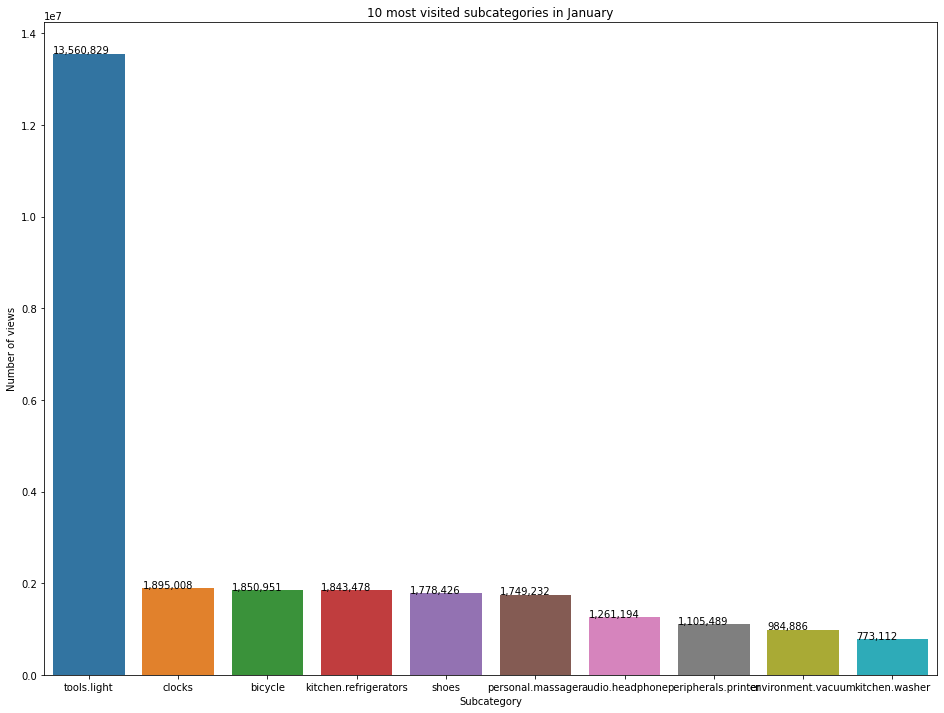

In [13]:
group_view_by_subcat=df[df['event_type']=='view'].groupby(['subcategory'])['price'].count()
sorted_group_view_by_subcat = group_view_by_subcat.dropna().sort_values(ascending=False)
plt.figure(figsize =(16, 12)) 
index_category = [str(i) for i in sorted_group_view_by_subcat.index]
ax= sns.barplot(index_category[:10],sorted_group_view_by_subcat[:10])
for p in ax.patches:
    ax.annotate(format(p.get_height(),',.0f'), (p.get_x() , p.get_height()),)
plt.title('10 most visited subcategories in {}'.format(name))
plt.xlabel('Subcategory')
plt.ylabel('Number of views')

### What are the 10 most sold products per category?

In [14]:
#Delete nan in order to avoid error
bf = df['category'].unique()
for i in bf:
    try:
        #make pivot table for each category, and sort values in descending order
        table4 = pd.pivot_table(df[df['category']==i], values='event_time', index=['category','product_id'],
                        columns=['event_type'], aggfunc=len)
        print(table4['purchase'].dropna().sort_values(ascending =False)[:9])
    except:
        print('No purchases in {}'.format(i))

category      product_id
construction  1004767      36854.000000
              1005100      26997.000000
              1005115      26401.000000
              1005212      16553.000000
              1002544      14992.000000
              1005160      11894.000000
              1005105      10629.000000
              1004873       9795.000000
              1004856       9008.000000
Name: purchase, dtype: float64
category  product_id
apparel   5100816      6188.000000
          4100346      2587.000000
          16500007     1139.000000
          1200947       959.000000
          4100126       884.000000
          1201504       738.000000
          100057088     671.000000
          5100503       617.000000
          4100129       516.000000
Name: purchase, dtype: float64
category    product_id
appliances  1005174      5475.000000
            1801690      2614.000000
            1801766      1999.000000
            3700926      1817.000000
            1005186      1728.000000
         

## [RQ4] How much does each brand earn per month? 

In [15]:
#made a pivot table to sum the selling price per each brand
brand_sum = pd.pivot_table(df, values='price', index=['brand'],
                    columns=['event_type'], aggfunc=sum)
brand_sum

event_type,cart,purchase,view
brand,,,
a-case,4228.100000,861.960000,222118.360000
a-derma,420.980000,34.190000,11682.700000
a-elita,90.260000,nan,8755.720000
a-mega,626.440000,296.690000,21878.030000
aardwolf,255.140000,47.500000,10682.710000
...,...,...,...
zwerg,nan,nan,511.760000
zwilling,nan,nan,366376.800000
zwillingjahenckels,1081.440000,nan,1467693.150000


In [16]:
#How much does each brand earn per month?
brand_revenue = brand_sum['purchase'].sort_values(ascending=False)
brand_revenue

brand
apple                125844143.839979
samsung               55786627.060015
xiaomi                12004205.120002
huawei                 5380149.959999
lg                     4200411.050000
                           ...       
zvezda                            nan
zwerg                             nan
zwilling                          nan
zwillingjahenckels                nan
zx                                nan
Name: purchase, Length: 5083, dtype: float64

### Write a function that given the name of a brand in input returns, for each month, its profit.

In [17]:
# Function that given the name of a brand in input returns, for each month, its profit. 
def profit_of_brand(brand_name,month):
    return month['purchase'][brand_name]

def profit_of_brand_for_each_month(brand_name,list_of_months):
    return [i['purchase'][brand_name] for i  in list_of_months]

### Is the average price of products of different brands significantly different? 

In [18]:
#Is the average price of products of different brands significantly different? 

table3 = pd.pivot_table(df, values='price', index=['subcategory','brand'],

                    columns=['event_type'], aggfunc='mean')
table3[:50]


event_type                                     cart   purchase       view
subcategory             brand                                            
accessories.alarm       absolutechampion  45.050000  45.050000  45.050000
                        appollo                 nan        nan  54.060000
                        asrock           137.980000        nan 129.521818
                        asus             181.110000        nan 181.220976
                        autoline                nan        nan 353.557872
                        body-solid              nan        nan 341.320000
                        cenmax                  nan        nan 100.390000
                        centurion         38.286250  39.895000  41.302401
                        dds              244.845441 244.196000 244.992986
                        dsk                     nan        nan  72.229184
                        kenwood          113.260000 113.260000 113.260000
                        kgb               84.940000  84.940000  84.940000
                        mydean           128.700000 128.700000 128.700000
                        pandora          109.395000        nan 184.578506
                        pioneer                 nan        nan  64.350000
                        romana                  nan        nan  68.518923
                        scher-khan        72.070000  72.070000  75.776362
                        silapro           15.960000  15.960000  15.960000
                        sparta            29.320000  29.320000  29.320000
                        spektrsport       39.380000        nan  39.380000
                        starline         211.973077 214.163000 139.114353
                        swat              42.071429  40.673333  42.555847
                        tec              352.650000        nan 352.650000
                        tomahawk          89.506364  86.230000  92.869683
                        torneo            22.650000  22.650000  22.650000
                        tuka              16.730000  16.730000  16.730000
                        uralsport         47.620000  47.620000  47.620000
accessories.anti_freeze adel              34.354000  33.400000  28.908511
                        alexrojo          46.330000        nan  43.242000
                        alvitek           17.286176  16.855714  17.871762
                        barokko           12.727000  12.790000  12.318347
                        bartek                  nan        nan  60.490000
                        belezza                 nan        nan  17.533846
                        biomecanics       35.780000        nan  38.280188
                        boarteks                nan        nan  26.351236
                        bugaboo                 nan        nan 141.550000
                        burton                  nan        nan 643.260000
                        butterfly         33.130000        nan  29.604118
                        casaconforte            nan        nan  15.833462
                        ekonomia                nan        nan  25.980000
                        elegant           14.410000        nan  14.404260
                        garvalin          37.903333  41.440000  37.399758
                        intex             37.680603  37.210469  39.031532
                        kroskaa                 nan        nan  25.809697
                        lealelo                 nan        nan  52.770000
                        merry                   nan        nan  25.680000
                        minimen           41.482857        nan  41.915055
                        neposeda          25.230000  25.230000  25.230000
                        pablosky          47.397143  53.540000  46.205507
                        perina                  nan        nan  16.610000

##  [RQ7] The Pareto principle states that for many outcomes roughly 80% of consequences come from 20% of the causes. Also known as 80/20 rule, in e-commerce simply means that most of your business, around 80%, likely comes from about 20% of your customers.

    Prove that the pareto principle applies to your store.


In [19]:
group_purchase_by_user=df[df['event_type']=='purchase'].groupby(['user_id'])['price'].sum()
sorted_group_purchase_by_user = group_purchase_by_user.dropna().sort_values(ascending=False)
sorted_group_purchase_by_user
#Group by user and sort all purchases by descending order

user_id
562104312   294910.730000
515428951   218647.800000
563599039   210609.420000
549109608   166872.390000
538216048   158411.290000
                 ...     
601775709        0.830000
543614784        0.830000
597613355        0.830000
604621030        0.830000
603798830        0.800000
Name: price, Length: 359105, dtype: float64

In [20]:
group_purchase_by_product=df[df['event_type']=='purchase']['price'].sum()
group_purchase_by_product
#get all the revenue that was made in this month

261034870.10000002

Percent of money 20 % of customers gave out of total 261034870.10000002: 71.30879300864461%


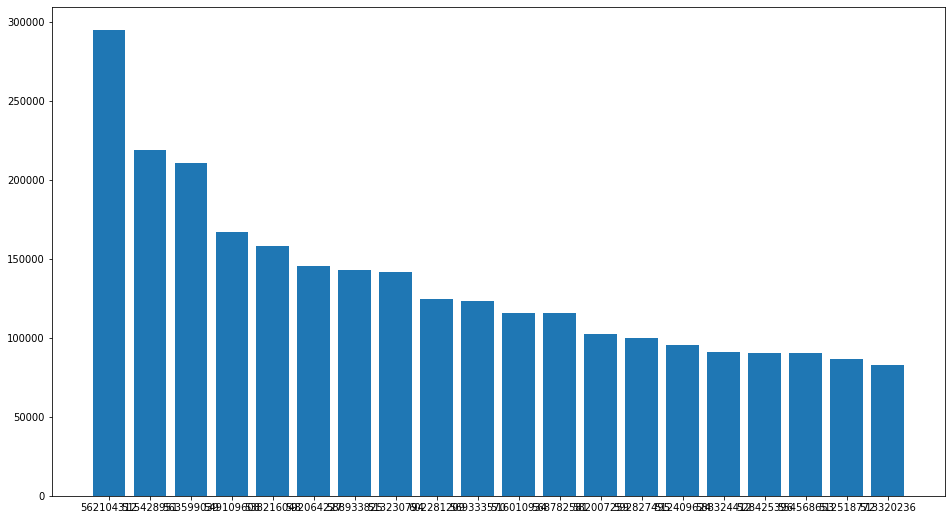

In [21]:
plt.figure(figsize =(16, 9)) 
amount_of_20percent_customers = len(sorted_group_purchase_by_user) * 0.2
#Count % of money that 20% of top customers gave
index_user = [str(i) for i in sorted_group_purchase_by_user.index]
plt.bar(index_user[:20],sorted_group_purchase_by_user[:20])
print('Percent of money 20 % of customers gave out of total {}: {}%'.format(group_purchase_by_product,sum(sorted_group_purchase_by_user[:int(amount_of_20percent_customers)]) /(group_purchase_by_product/100) ))